In [5]:
import pandas as pd
from sklearn import datasets
data = datasets.load_diabetes()

In [6]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [9]:
df = pd.DataFrame(data.data, columns =data.feature_names)
df['target'] = pd.Series(data.target)

In [10]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [15]:
df[df.duplicated()]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target


In [16]:
y = df['target']
x = df.drop('target',axis = 1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 500)

gbr.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [21]:
y_pred = gbr.predict(x_test,)
print(y_pred)

[255.02101794 207.42829645 179.85705675 136.31592241 212.97766292
 226.13396728 105.08799118 214.57708437 111.13373239 264.76090602
 197.96740644 149.83381635 122.49767269  97.4305465  308.01687012
  95.84296105 147.98150856  53.40404103  94.83128062 256.47059022
 154.00548925 127.54205669 187.25970754 146.55660359 213.07718057
 186.68199607 150.30123661  65.5734697  273.02793001 129.18251433
 214.2533022   81.59559227 150.79557459 158.11372079 156.67604223
 168.43173901 176.4382179  120.11136791  98.22209211 195.91362202
 123.68388296 146.24673218 106.75731725 178.67984899 153.01676467
  86.06759503 122.85298779 118.84166227  77.1481149  283.01285064
 139.5227162   44.89671182 130.88657031 164.55665853 241.48431364
 162.22648217 204.95238095 124.80532768  90.25600828 183.34060951
 248.27397257 156.79067317 122.7951438   81.39876678 262.75076351
 149.86257416  85.48633701 277.04170513 227.69490672 114.97547638
  83.19528735 144.36098797 130.34481447 125.82209324 135.84765548
 154.22707

In [26]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred,y_test)
print(mae)

52.23005711840161


In [29]:
feature_score = pd.Series(gbr.feature_importances_, index = x_train.columns).sort_values(ascending = False)
print(feature_score)

s5     0.383799
bmi    0.214697
bp     0.092042
s2     0.078669
s6     0.055259
s3     0.052801
age    0.045627
s1     0.042370
s4     0.019077
sex    0.015659
dtype: float64


Text(0, 0.5, 'Features')

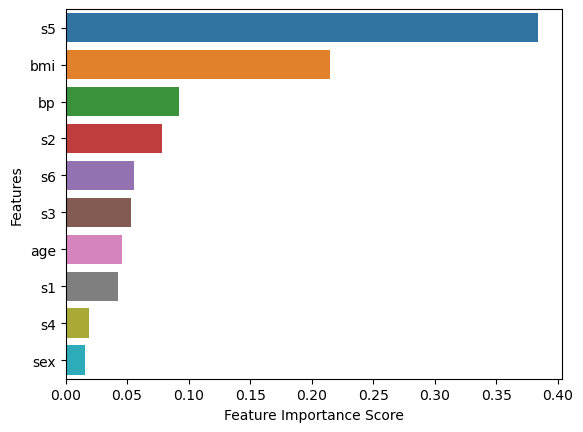

In [33]:
sns.barplot(x = feature_score, y = feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

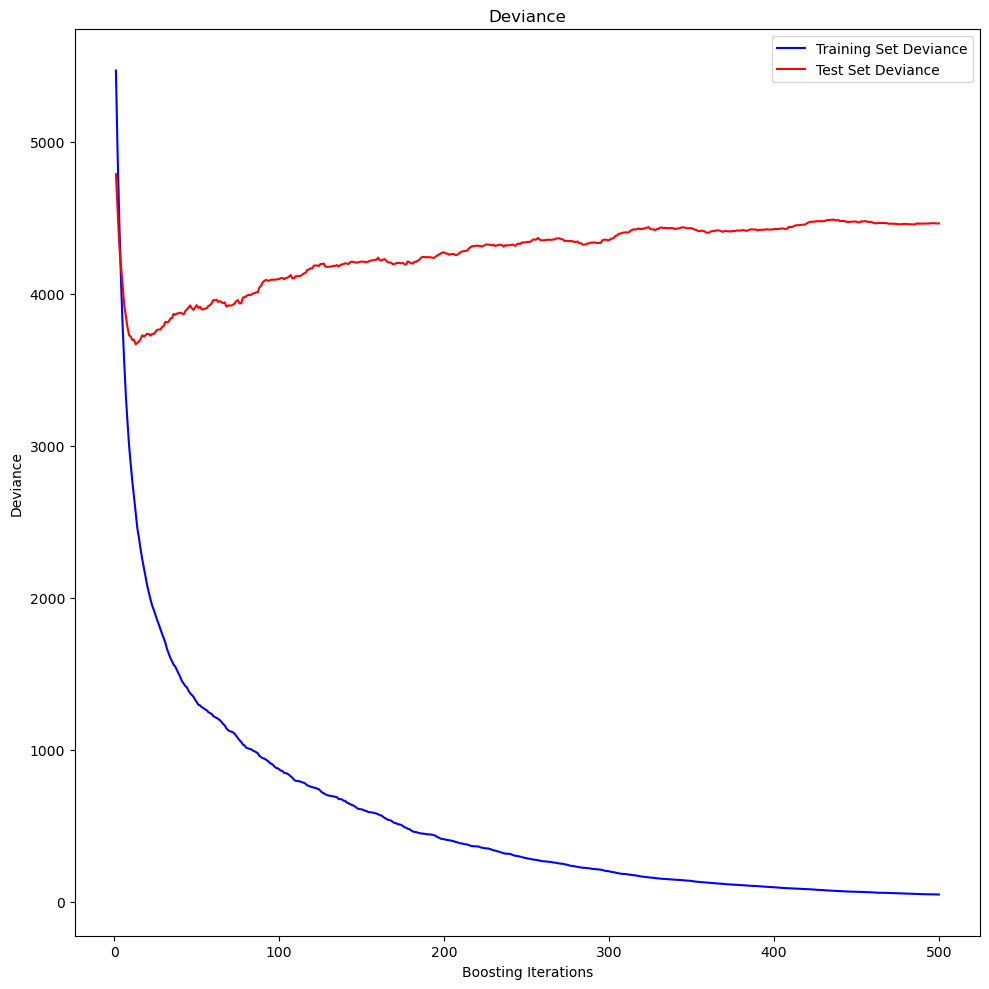

In [35]:
test_score = np.zeros((500,), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(x_test)):
    test_score[i] = gbr.loss_(y_test, y_pred)

fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(500) + 1, gbr.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(500) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()
